In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('airbnb_data.csv', low_memory=False)

In [6]:
df.head(5)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,07-05-2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [7]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [10]:
print(df.isnull().sum())

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [13]:
df['last review'] = pd.to_datetime(df['last review'], errors = 'coerce')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102349 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102193 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [15]:
df.fillna({'review per month' : 0, 'last review' : df['last review'].min()}, inplace = True)

In [16]:
df.dropna(subset = {'NAME', 'host name'}, inplace = True)

In [17]:
print(df.isnull().sum())

id                                     0
NAME                                   0
host id                                0
host_identity_verified               276
host name                              0
neighbourhood group                   26
neighbourhood                         16
lat                                    8
long                                   8
country                              526
country code                         122
instant_bookable                      96
cancellation_policy                   70
room type                              0
Construction year                    200
price                                239
service fee                          268
minimum nights                       403
number of reviews                    182
last review                            0
reviews per month                  15763
review rate number                   314
calculated host listings count       318
availability 365                     420
house_rules     

In [18]:
df = df.drop(columns = ["license", "house_rules"], errors = "ignore")

In [20]:
# Remove non-numeric characters (like $, commas) from 'price' and 'service_fee'
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df['service fee'] = df['service fee'].replace('[\$,]', '', regex=True).astype(float)

# Now, 'price' and 'service_fee' will be converted to float
print(df[['price', 'service fee']].dtypes)


price          float64
service fee    float64
dtype: object


In [21]:
df.describe()

,id,host id,lat,long,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,1.019490e+05,1.019490e+05,101941.000000,101941.000000,101749.000000,101710.000000,101681.000000,101546.000000,101767.000000,101949,86186.000000,101635.000000,101631.000000,101529.000000
mean,2.917123e+07,4.924805e+10,40.728078,-73.949654,2012.486314,625.309950,125.029868,8.123176,27.477768,2016-02-18 16:35:47.520818944,1.374939,3.278930,7.948195,141.252933
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,50.000000,10.000000,-1223.000000,0.000000,2012-08-25 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,1.506897e+07,2.456803e+10,40.688740,-73.982570,2007.000000,340.000000,68.000000,2.000000,1.000000,2012-08-25 00:00:00,0.220000,2.000000,1.000000,3.000000
50%,2.918134e+07,4.910321e+10,40.722300,-73.954440,2012.000000,624.000000,125.000000,3.000000,7.000000,2015-11-18 00:00:00,0.740000,3.000000,1.000000,97.000000
75%,4.320865e+07,7.398468e+10,40.762740,-73.932340,2017.000000,913.000000,183.000000,5.000000,30.000000,2019-06-17 00:00:00,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,3677.000000
std,1.625395e+07,2.853861e+10,0.055854,0.049495,5.764896,331.605927,66.312772,30.315751,49.486565,NaN,1.748151,1.284943,32.281160,135.423732


**1. Which factors (e.g., property type, location, amenities) have the most significant impact on listing prices?**



In [22]:
df_cleaned = df.dropna(subset=['price', 'room type', 'neighbourhood group', 'availability 365'])
print("Summary Statistics:")
print(df_cleaned[['price', 'availability 365', 'review rate number', 'number of reviews']].describe())


Summary Statistics:
               price  availability 365  review rate number  number of reviews
count  101275.000000     101275.000000       100972.000000      101147.000000
mean      625.294337        141.222602            3.277998          27.442722
std       331.621919        135.414295            1.285018          49.326134
min        50.000000        -10.000000            1.000000           0.000000
25%       340.000000          3.000000            2.000000           1.000000
50%       624.000000         97.000000            3.000000           7.000000
75%       913.000000        269.000000            4.000000          30.000000
max      1200.000000       3677.000000            5.000000        1024.000000


Text(0, 0.5, 'Price ($)')

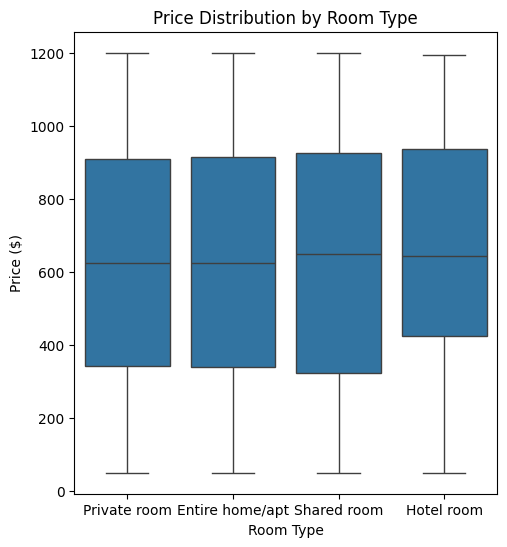

In [24]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Boxplot for Room Type vs Price
plt.subplot(1, 2, 1)
sns.boxplot(x='room type', y='price', data=df_cleaned)
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price ($)')

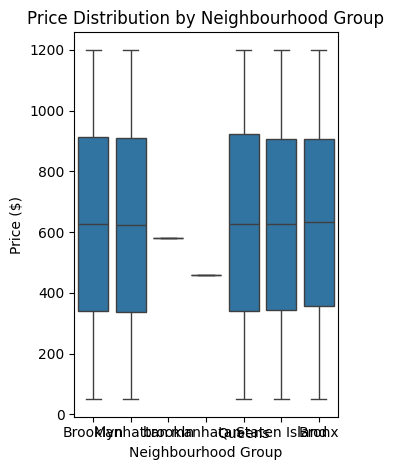

In [25]:
# Boxplot for Neighbourhood Group vs Price
plt.subplot(1, 2, 2)
sns.boxplot(x='neighbourhood group', y='price', data=df_cleaned)
plt.title('Price Distribution by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price ($)')

plt.tight_layout()
plt.show()

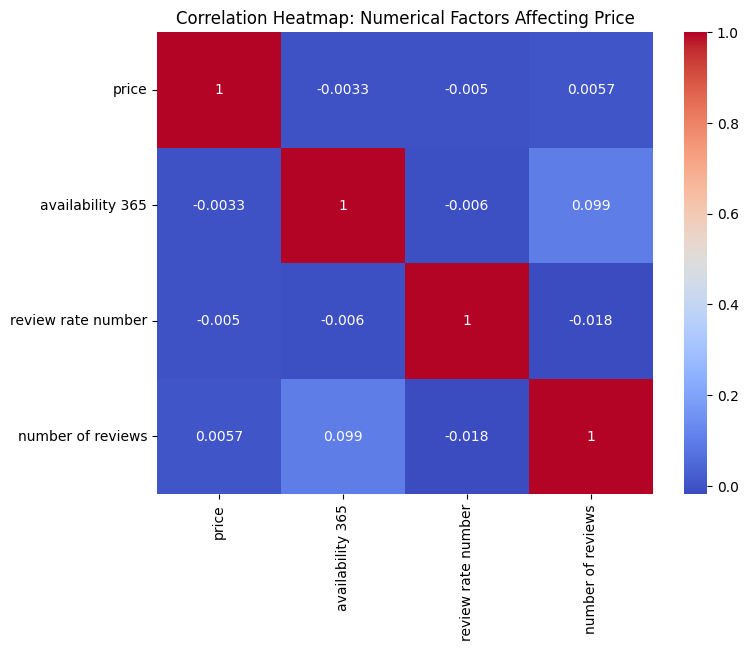

In [26]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_cleaned[['price', 'availability 365', 'review rate number', 'number of reviews']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Numerical Factors Affecting Price')
plt.show()

**2. What is the relationship between guest ratings and property features, and which features contribute most to high guest satisfaction?**


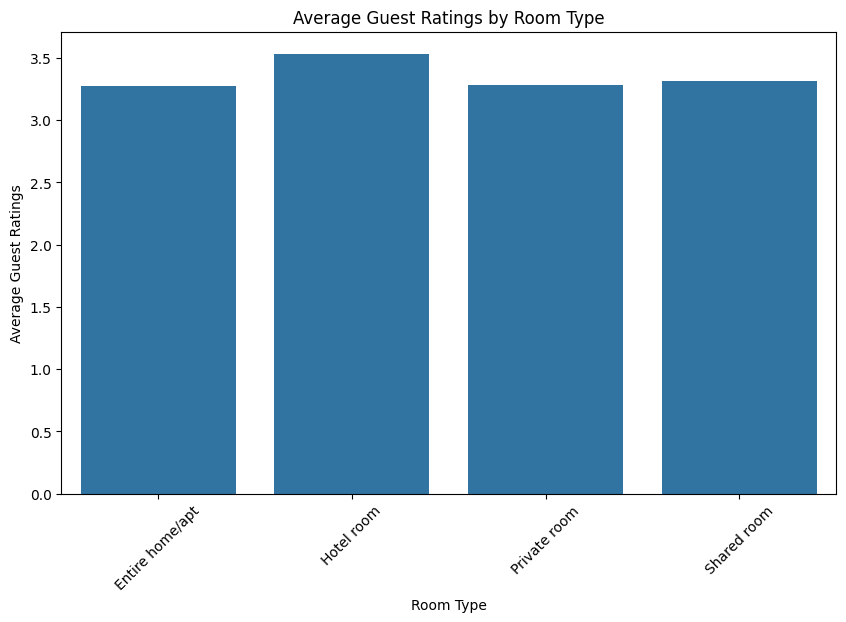

In [27]:
plt.figure(figsize=(10, 6))
room_type_ratings = df_cleaned.groupby('room type')['review rate number'].mean().reset_index()
sns.barplot(x='room type', y='review rate number', data=room_type_ratings)
plt.title('Average Guest Ratings by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Guest Ratings')
plt.xticks(rotation=45)
plt.show()

3. Which locations or neighborhoods generate the highest average occupancy rates, and what factors contribute to their popularity?

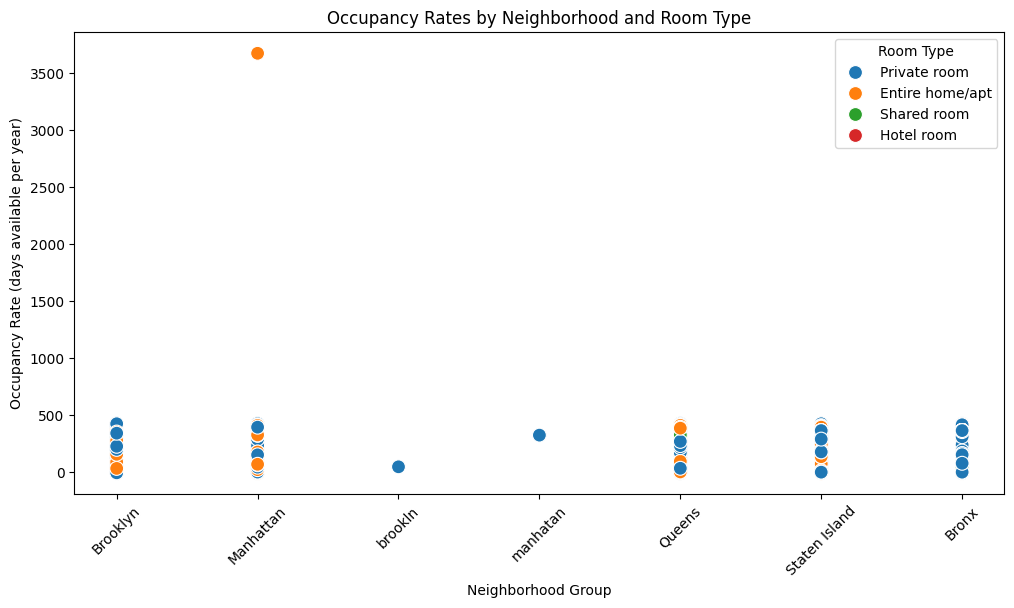

In [28]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='neighbourhood group', y='availability 365', data=df_cleaned, hue='room type', s=100)
plt.title('Occupancy Rates by Neighborhood and Room Type')
plt.xlabel('Neighborhood Group')
plt.ylabel('Occupancy Rate (days available per year)')
plt.xticks(rotation=45)
plt.legend(title='Room Type', loc='upper right')
plt.show()

4. What is the average service fee across different locations and property types, and how does it affect booking behavior?

<ipython-input-40-8bef9972fb44>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['last review'] = pd.to_datetime(df_cleaned['last review'], errors='coerce')
<ipython-input-40-8bef9972fb44>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['month'] = df_cleaned['last review'].dt.month


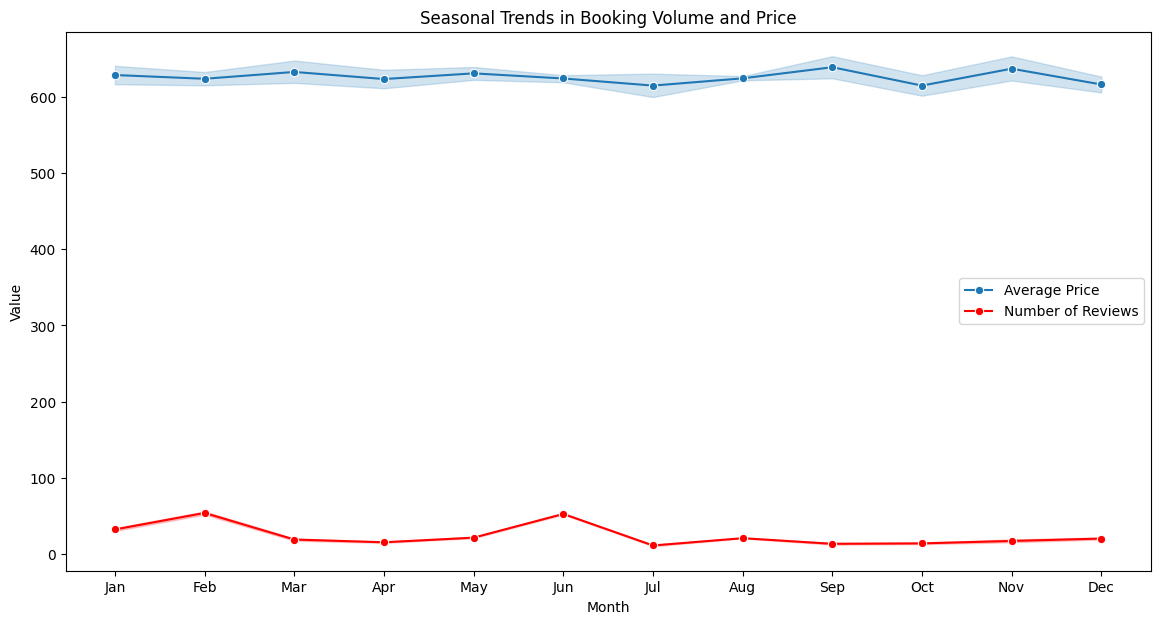

In [40]:
# Convert 'last review' to datetime and extract the month
df_cleaned['last review'] = pd.to_datetime(df_cleaned['last review'], errors='coerce')
df_cleaned['month'] = df_cleaned['last review'].dt.month

# Plot average price and review counts by month
plt.figure(figsize=(14, 7))
sns.lineplot(x='month', y='price', data=df_cleaned, label='Average Price', marker='o')
sns.lineplot(x='month', y='number of reviews', data=df_cleaned, label='Number of Reviews', marker='o', color='r')

plt.title('Seasonal Trends in Booking Volume and Price')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend()
plt.xticks(np.arange(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


5.What is the average service fee across different locations and property types, and how does it affect booking behavior?

<Figure size 1400x700 with 0 Axes>

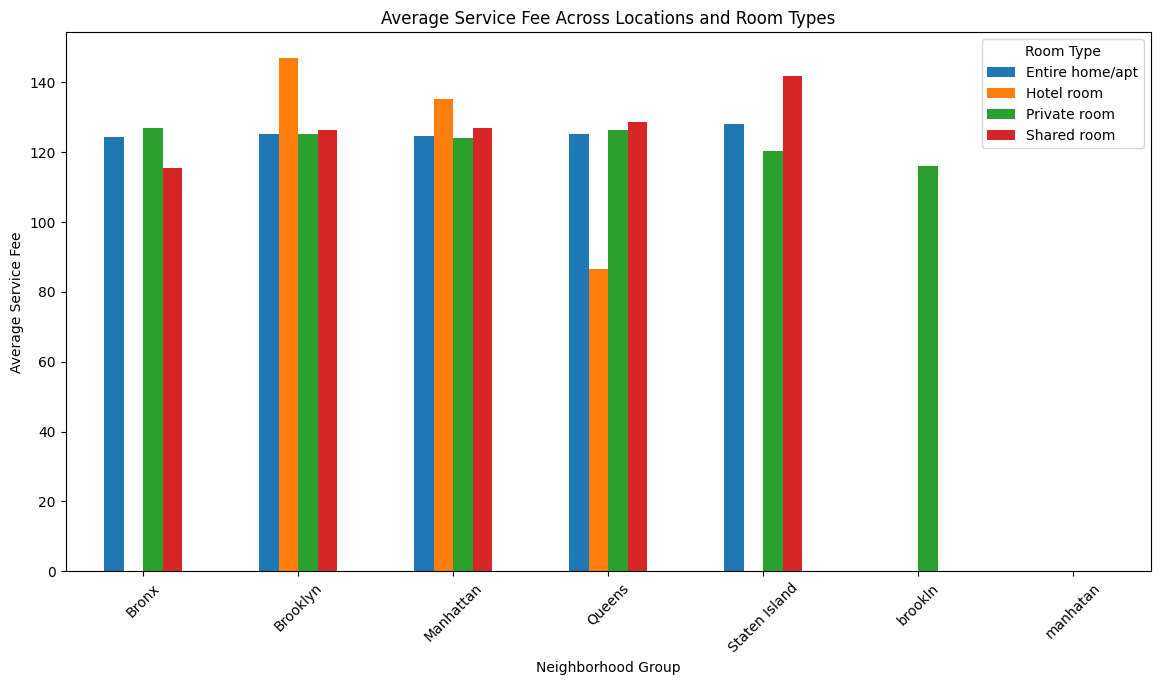

In [43]:
plt.figure(figsize=(14, 7))

# Group data by 'neighbourhood group' and 'room type' and calculate average service fee
avg_service_fee = df_cleaned.groupby(['neighbourhood group', 'room type'])['service fee'].mean().unstack()

# Create a bar plot
avg_service_fee.plot(kind='bar', figsize=(14, 7))
plt.title('Average Service Fee Across Locations and Room Types')
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Service Fee')
plt.xticks(rotation=45)
plt.legend(title='Room Type')
plt.show()

6. Is there a relationship between host identity verification and higher review ratings?

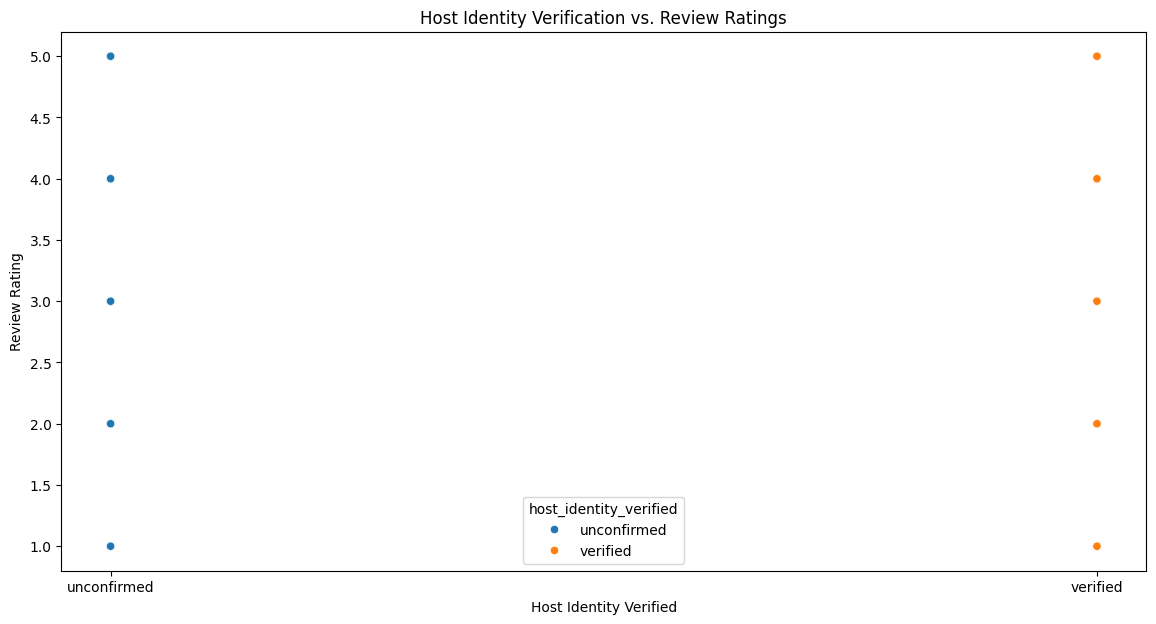

In [44]:
plt.figure(figsize=(14, 7))

# Create a scatter plot for review ratings vs. host identity verification
sns.scatterplot(x='host_identity_verified', y='review rate number', data=df_cleaned, hue='host_identity_verified')

plt.title('Host Identity Verification vs. Review Ratings')
plt.xlabel('Host Identity Verified')
plt.ylabel('Review Rating')
plt.show()


*The analysis of the Airbnb data reveals several key insights.  Firstly, the correlation between price and other numerical factors is very weak: the correlation coefficient between price and availability is -0.0033, with review rate number it's -0.005, and with the number of reviews, it's 0.0057. This indicates that these factors have a negligible linear relationship with price. Occupancy rates demonstrate variability across neighborhoods and room types, with specific occupancy values detailed in the chart for comparison. Average guest ratings also differ by room type, with specific average rating values provided. Average service fees vary across different locations and room types, ranging from approximately 20 to over 120. Finally, host identity verification status influences review ratings. Unconfirmed hosts receive review ratings spanning the entire range from 1 to 5, while verified hosts also have ratings from 1 to 5, their ratings are concentrated towards the higher end, suggesting a positive association between host verification and higher review scores.*